# Edge Detection with Sobel Filter

Corr2D가 실제 영상신호처리에서 어떻게 사용되는지 edge filtering을 통해 학습

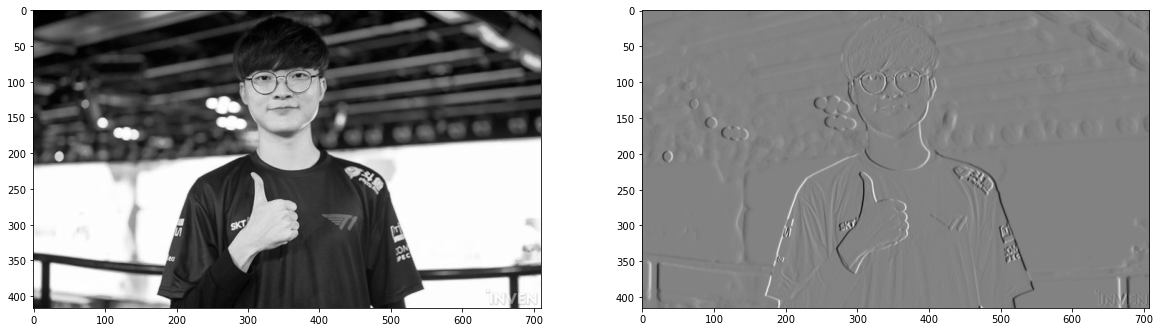

In [14]:
import matplotlib.pyplot as plt

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

img = plt.imread('./faker.jpg')
img = rgb2gray(img).tolist()

sobel_x = [[-1, 0, 1], # conv 계산해서 (1 - 0 - -1) 밝음->어두움
           [-2, 0, 2],
           [-1, 0, 1]]
sobel_y = [[1, 2, 1],
           [0, 0, 0],
           [-1, -2, -1]]

##### select filter type(start) #####
conv_filter = sobel_x
##### select filter type(end) #####

filter_size = len(conv_filter)
H , W = len(img), len(img[0])

valid_H , valid_W = H - filter_size + 1, W - filter_size + 1

conv_mat = list()
for h in range(valid_H):
    conv_vec = list()
    for w in range(valid_W):
        window = list()
        
        for inner_h in range(filter_size):
            window.append(img[h+inner_h][w:w+filter_size])
        
        flatten_window, flatten_filter = list(), list()
        for inner_h in range(filter_size):
            for inner_w in range(filter_size):
                flatten_window.append(window[inner_h][inner_w])
                flatten_filter.append(conv_filter[inner_h][inner_w])
        flatten_filter = flatten_filter[::-1] # 사실상 corr연산이지만 필터에 conv처리 (180도회전)를 해도 변함이 없는 경우가 많아서 신호처리에서는 둘 다 혼용하여 사용함
        
        conv = 0
        for window_val, filter_val in zip(flatten_window, flatten_filter):
            conv += window_val * filter_val
            
        conv_vec.append(conv)
    conv_mat.append(conv_vec)

##### Edge Detection #####
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(img, 'gray')
axes[1].imshow(conv_mat, 'gray')

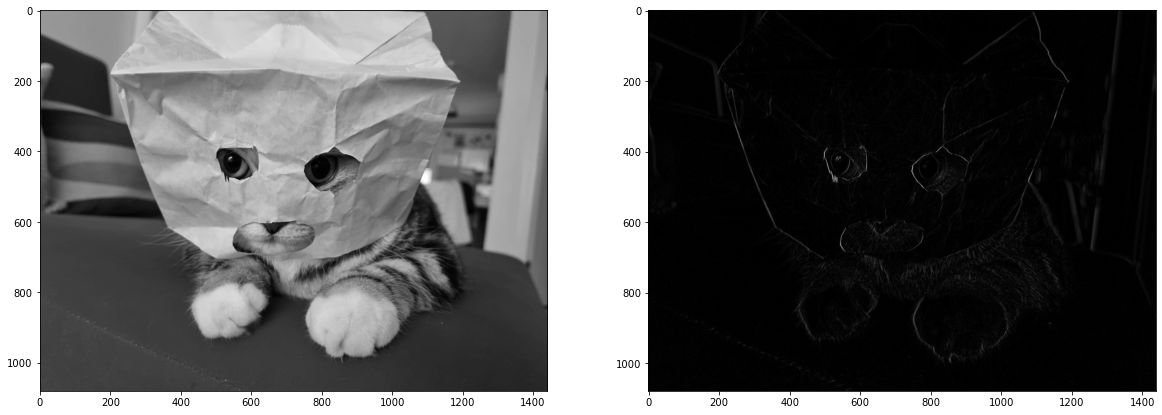

In [17]:
import matplotlib.pyplot as plt

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

img = plt.imread('./mio.jpg')
img = rgb2gray(img).tolist()

sobel_x = [[-1, 0, 1], # conv 계산해서 (1 - 0 - -1) 밝음->어두움
           [-2, 0, 2],
           [-1, 0, 1]]
sobel_y = [[1, 2, 1],
           [0, 0, 0],
           [-1, -2, -1]]

##### select filter type(start) #####
conv_filter = sobel_x
##### select filter type(end) #####

filter_size = len(conv_filter)

H , W = len(img), len(img[0])
valid_H , valid_W = H - filter_size + 1, W - filter_size + 1

conv_mat = list()
for h in range(valid_H):
    conv_vec = list()
    for w in range(valid_W):
        window = list()
        
        for inner_h in range(filter_size):
            window.append(img[h+inner_h][w:w+filter_size])
        
        flatten_window, flatten_filter = list(), list()
        for inner_h in range(filter_size):
            for inner_w in range(filter_size):
                flatten_window.append(window[inner_h][inner_w])
                flatten_filter.append(conv_filter[inner_h][inner_w])
        flatten_filter = flatten_filter[::-1] # 사실상 corr연산이지만 필터에 conv처리 (180도회전)를 해도 변함이 없는 경우가 많아서 신호처리에서는 둘 다 혼용하여 사용함
        
        conv = 0
        for window_val, filter_val in zip(flatten_window, flatten_filter):
            conv += window_val * filter_val
            
        if conv < 0:      # 절댓값을 해줘서 어두워지다 밝아질때를 감지하도록
            conv *= -1
            
        conv_vec.append(conv)
    conv_mat.append(conv_vec)

##### Edge Detection #####
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(img, 'gray')
axes[1].imshow(conv_mat, 'gray')